# Reversible Pattern Formation

In [1]:
import sys
sys.path.append('..')


#from rdsolver import turing_pattern as tNp
#dir(rds)
from rdsolver.reaction_diffu import *

In [288]:
class RevPattern(RDSystem):
    def __init__(self,
                 Du = 0.1, 
                 Dv = .05,
                 Req1 = 0.037,
                 Req2 = 0.06,
                 k0 = 10,
                 space_size = 100,dim = 2,
                 dt=0.01,
                 boundary = 'periodic',
                 init_dis= 'random',
                 *args):
        self.Req1 = Req1
        self.Req2 = Req2
        self.k0 = k0
        Reactant1 = Reactant(Du)
        Reactant2 = Reactant(Dv)
        reactants = [Reactant1,Reactant2]
        RDSystem.__init__(self,reactants,
                          space_size =space_size, 
                          init_dis = init_dis ,
                          boundary = boundary, dim=dim,dt=dt)
        self.dx = 3
        #self.dis = self.dis * 3.2
        a = np.array(self.dis)
        self.dis[0,:,:] = .8 + 0.1*a[0]
        self.dis[1,:,:] = .8 - 0.1*a[0]
        #self.dis[1,np.random.randint(space_size,size=20),np.random.randint(space_size,size=20)] = 0
        #self.dis[0,round(4*space_size/9):round(5*space_size/9),round(4*space_size/9):round(5*space_size/9)] = 0.8
        #self.dis[1,round(4*space_size/9):round(5*space_size/9),round(4*space_size/9):round(5*space_size/9)] = 1
        
        #self.dis[0,round(4*space_size/9+10):round(5*space_size/9+10),round(4*space_size/9+10):round(5*space_size/9+10)] = 0.8
        #self.dis[1,round(4*space_size/9+10):round(5*space_size/9+10),round(4*space_size/9+10):round(5*space_size/9+10)] = 1
        
        self.dis[1] = self.dis[1]
        
    def reaction(self):
        u = self.dis
        dudt_reac = np.zeros(np.shape(self.dis))      
        if self.dim==2: #2D 
            dudt_reac[0,:,:] += self.k0* (self.Req1 * u[1] - u[0]) + u[0]**3  * (self.Req2 * u[1] - u[0]) 
            dudt_reac[1,:,:] += self.k0* (u[0] - self.Req1 * u[1]) + u[0]**3  * (u[0] - self.Req2 * u[1] ) 
        return dudt_reac

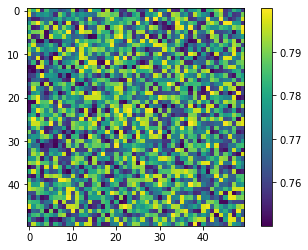

In [293]:
RP = RevPattern(Du = 0.5, 
                Dv = 2,
                Req1 = 0.05,
                Req2 = 3,
                space_size = 50,
                k0 =1,
                dt = 0.5)
plt.imshow(RP.dis[1])
plt.colorbar()

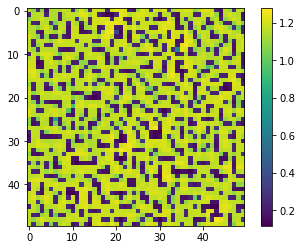

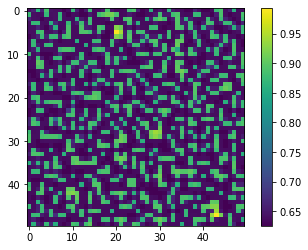

In [294]:
#Turing_1.stationary()
t=np.linspace(0,100,10)
time_series = RP.integrate(t);
#Turing_1.stationary(|)
plt.imshow(RP.dis[0])
plt.colorbar()
plt.show()
plt.imshow(RP.dis[1])
plt.colorbar()
plt.show()

In [191]:
def plotpattern(dis,save=True):
    fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(18,6))
    u0 =ax1.imshow(dis[0])
    ax1.axis('off')
    plt.colorbar(u0,ax=ax1, fraction=0.046, pad=0.04, orientation="horizontal")
    u1 = ax2.imshow(dis[1])
    ax2.axis('off')
    plt.colorbar(u1,ax=ax2, fraction=0.046, pad=0.04,orientation="horizontal")
    utot = ax3.imshow(dis[0]+dis[1])
    ax3.axis('off')
    plt.colorbar(utot,ax=ax3,fraction=0.046, pad=0.04,orientation="horizontal")
    return fig

In [261]:
t=np.linspace(0,200,200)
time_series = RP.integrate(t);

In [263]:
for i in range(200):
    immat = time_series[i].reshape((2,50,50))
    plotpattern(immat)
    #plt.colorbar()
    plt.savefig("./rev_pattern_5/pattern_%i.png"%(i+100))
    plt.close()

### Pattern 2
```python
RP = RevPattern(Du = .8, 
                Dv = 0.3,
                Req1 = 0.1,
                Req2 = 2,
                space_size = 100,
                k0 =1,
                dt = 0.1)
self.dis = self.dis * 4
```
### Pattern 3
```python
RP = RevPattern(Du = .8, 
                Dv = 0.7,
                Req1 = 0.1,
                Req2 = 2,
                space_size = 100,
                k0 =1,
                dt = 0.1)
self.dis = self.dis * 4
```

### Pattern 4
```python
RP = RevPattern(Du = .5, 
                Dv = 1,
                Req1 = 0.1,
                Req2 = 2,
                space_size = 50,
                k0 =1,
                dt = 0.1)
self.dis = self.dis * 4
```